In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ignore the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read dataset from a Google Drive File

file_link = 'https://drive.google.com/file/d/1Nsyp-huFIzEPBiqD6H1vNzo7HORcrJmi/view?usp=sharing' # the file access must have to be Public

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id so that we can easily read the csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
data = pd.read_csv(new_link)

# let's look at the first few instances
data.head(10)

,X1,X2
0,6.21,5.99
1,6.16,5.65
2,4.70,3.48
3,4.21,2.55
4,4.03,2.77
5,4.96,2.93
6,6.39,5.25
7,6.69,6.19
8,4.31,2.91
9,7.53,6.91


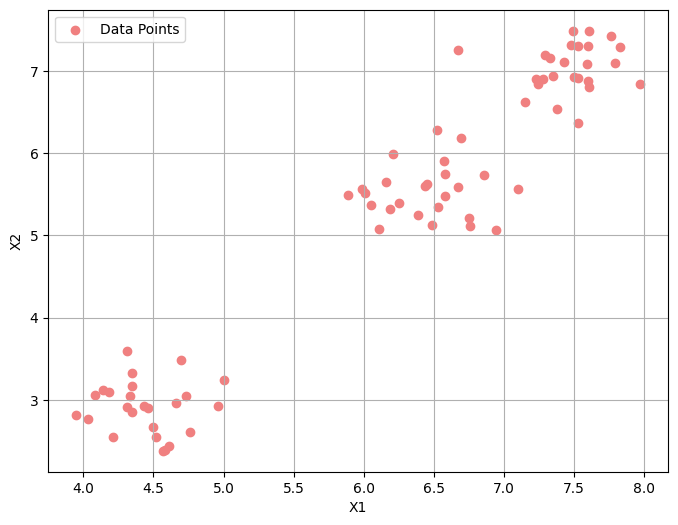

In [3]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(data["X1"], data["X2"], c='lightcoral', label='Data Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

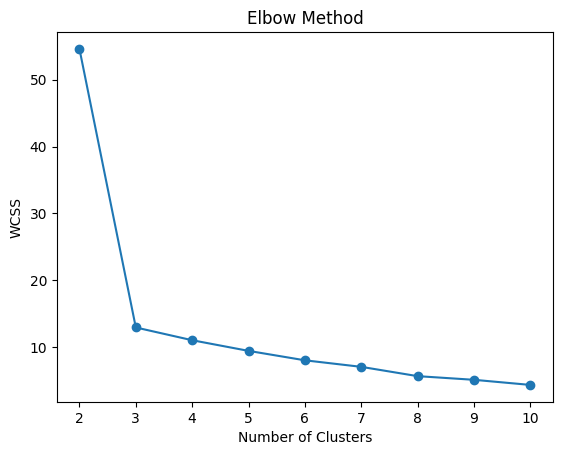

In [4]:
# Finding the Optimal Value of K (Elbow Method)
wcss = [] # Within-Cluster Sum of Square
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 200, random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

[[4.4428 2.9136]
 [6.4472 5.5284]
 [7.4708 7.0404]]
[1 1 0 0 0 0 1 1 0 2 2 2 1 0 0 1 2 0 2 0 2 1 2 1 2 1 1 0 1 2 2 0 1 2 2 2 1
 2 2 2 1 2 1 2 2 0 0 1 1 0 0 0 0 0 2 0 0 1 0 1 1 2 1 0 2 1 1 0 0 2 2 1 2 1
 0]


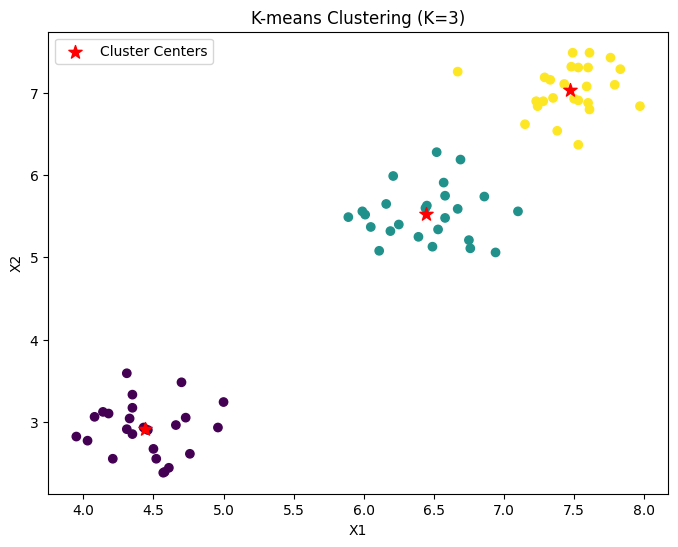

In [5]:
# Apply K-means with K = 3
K = 3
kmeans = KMeans(n_clusters = K, init = 'random', max_iter = 200, random_state = 42)
kmeans.fit(data)

# Get Cluster Centers and Labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
print(cluster_centers)
print(labels)

# Plot the Clustered Data
plt.figure(figsize=(8, 6))
plt.scatter(data["X1"], data["X2"], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=100, c='red', label='Cluster Centers')
plt.title('K-means Clustering (K=3)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
# plt.grid(True)
plt.show()

Cluster Centroids:
 [[4.4428 2.9136]
 [7.4708 7.0404]
 [6.4472 5.5284]]
Cluster Labels:
 [2 2 0 0 0 0 2 2 0 1 1 1 2 0 0 2 1 0 1 0 1 2 1 2 1 2 2 0 2 1 1 0 2 1 1 1 2
 1 1 1 2 1 2 1 1 0 0 2 2 0 0 0 0 0 1 0 0 2 0 2 2 1 2 0 1 2 2 0 0 1 1 2 1 2
 0]


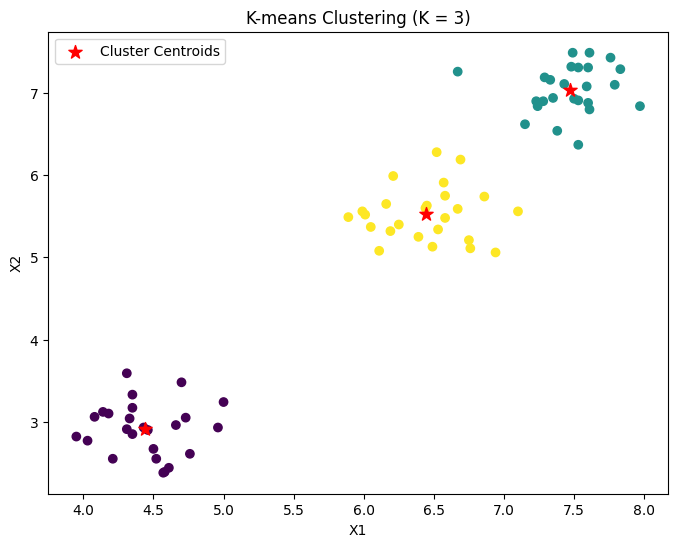

In [9]:
# Now implement the same thing from Scratch

def euclidean_distance(centroid, dataPoint):
    return np.sqrt(np.sum((centroid - dataPoint) ** 2))

def manhattan_distance(centroid, dataPoint):
    return np.sum(np.abs(centroid - dataPoint))

def kmeans_fit(dataset, k, distance = 'euclidean', max_iterations = 100):
    ## Your Code Here ###

    #Initialize k centroids randomly
    centroids = dataset[np.random.choice(dataset.shape[0], k, replace=False)]

    # centroids = dataset.sample(n=k, random_state=42).values
    labels = np.zeros(len(dataset))

    # Loop till max_iterations:
        # Assign each data point to the nearest centroid by calculating the distance
        # Store the assigned labels
        # Update the centroids based on the mean of the points assigned to each cluster

    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        for i, dataPoint in enumerate(dataset):
            distances = [euclidean_distance(centroid, dataPoint) if distance == 'euclidean' else manhattan_distance(centroid, dataPoint) if distance == 'manhattan' else None for centroid in centroids]
            labels[i] = np.argmin(distances)

        for i in range(k):
            cluster_points = dataset[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = np.mean(cluster_points, axis=0)

    return centroids, labels.astype(int)

# Apply K-Means from scratch with K = 3
centroids, labels = kmeans_fit(data.values, k = 3, distance = 'manhattan', max_iterations = 200)

# Print centroids and labels
print("Cluster Centroids:\n", centroids)
print("Cluster Labels:\n", labels)

# Lastly, Plot the Clustered Data
plt.figure(figsize=(8, 6))
plt.scatter(data["X1"], data["X2"], c = labels, cmap ='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s = 100, c='red', label='Cluster Centroids')
plt.title('K-means Clustering (K = 3)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
# plt.grid(True)
plt.show()

